# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [127]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

In [128]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [129]:
spaceship.shape

(8693, 14)

**Check for data types**

In [130]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [131]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [132]:
spaceship.dropna(inplace=True)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [133]:
def transform_cabin(row):
    return row[0]

spaceship['Cabin'] = spaceship['Cabin'].map(transform_cabin)

- Drop PassengerId and Name

In [134]:
spaceship.drop(columns=['PassengerId', 'Name'], inplace=True)

- For non-numerical columns, do dummies.

In [135]:
# Columns storing boolean values casted as boolean

spaceship['CryoSleep'] = spaceship['CryoSleep'].astype('bool')
spaceship['VIP'] = spaceship['VIP'].astype('bool')

In [136]:
# Get dummies for columns storing strings. Returns a DF of 23 columns
spaceship_dummies = pd.get_dummies(data=spaceship, columns=spaceship.select_dtypes('object').columns, dtype='bool')
spaceship_dummies

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,True,False,False,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,...,False,False,False,False,True,False,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,False,...,False,False,False,False,False,False,False,True,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,True,...,False,False,False,False,False,True,False,False,True,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,True,...,False,False,False,False,False,True,False,False,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,False,...,False,False,False,True,False,False,False,True,False,False


**Perform Train Test Split**

In [137]:
# Get numerical columns 
numerical = spaceship_dummies.select_dtypes('number')
numerical['Transported'] = spaceship_dummies['Transported']

# Get categorical columns
categorical = spaceship_dummies.select_dtypes('bool')

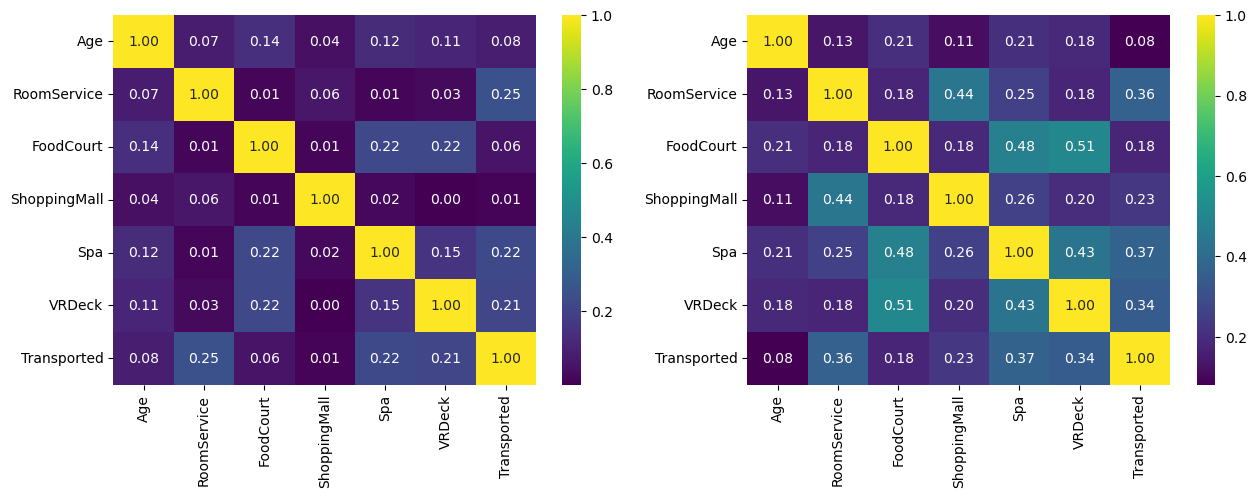

In [138]:
# Check (non)linear correlations between numerical variables
# We want to keep heavily correlated variables with our target ('Transported'). If variables are correlated between them, keep only one (the most heavily correlated with our target)

pearson_matrix, spearman_matrix = np.abs(numerical.corr('pearson')), np.abs(numerical.corr('spearman'))

fig, (ax1, ax2) = plt.subplots(1,2)

sns.heatmap(pearson_matrix, annot=True, fmt=".2f", cmap="viridis", ax=ax1)

sns.heatmap(spearman_matrix, annot=True, fmt=".2f", cmap="viridis", ax=ax2)
fig.set_figwidth(15)

In [139]:
## We'll drop Age as it is poorly correlated with our target. FoodCourt shows a small correlation too and moderate correlations to Spa and VRDeck, drop it too.

In [140]:
# Decide to keep or drop categorical variables. We do that by assessing (in)dependence with the target applying Chi2 tests.
categorical_drop = []
for column in categorical.columns:
    crosstab = pd.crosstab(index=categorical['Transported'], columns=categorical[column])
    chi2_p_value = chi2_contingency(crosstab)[1]
    if chi2_p_value >= 0.05:   # Variable not related, drop it
        categorical_drop.append(column)

categorical_drop    # We'll drop the columns in this list as they are concluded to not be related to the target

['HomePlanet_Mars',
 'Cabin_A',
 'Cabin_G',
 'Cabin_T',
 'Destination_PSO J318.5-22']

In [141]:
target = spaceship_dummies['Transported']
features = spaceship_dummies.drop(columns=(categorical_drop + ['Transported','Age','FoodCourt']))

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [142]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [143]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

- Evaluate your model's performance. Comment it

In [144]:
print(f'Training set accuracy: ', round(knn.score(X_train_norm, y_train), 3))
print(f'Test set accuracy: ', round(knn.score(X_test_norm, y_test), 3))

Training set accuracy:  0.817
Test set accuracy:  0.766


In [ ]:
## Including some (relevant) categorical variables and removing some numerical ones did not improve the performance of our model significantly, although it overfits a bit more.